In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
okt= Okt()

In [2]:
train_file = "finall_mbti_data.csv"
data = pd.read_csv(train_file)
data.drop(['Unnamed: 0'], axis=1, inplace=True )
data.head()

,text,type
0,엔프제 남자랑 연락하는데,0
1,내가 잘하고 있는걸까,0
2,아무리봐도 친구사이인데,0
3,이거 호감표현인가요,0
4,바람 펴본적 있거나 끌려본적 있음,0


In [3]:
data.isnull().sum()

text    157
type      0
dtype: int64

In [4]:
data = data.dropna(axis=0)
data

,text,type
0,엔프제 남자랑 연락하는데,0
1,내가 잘하고 있는걸까,0
2,아무리봐도 친구사이인데,0
3,이거 호감표현인가요,0
4,바람 펴본적 있거나 끌려본적 있음,0
...,...,...
390394,쪼아,6
390395,엣띱이다,6
390396,이거친구들이보는것도잇던데,6
390397,다들비슷하게나옴??,6


In [5]:
data.isnull().sum()

text    0
type    0
dtype: int64

In [6]:
train_data, test_data = train_test_split(data, random_state=66, test_size=0.2)

In [7]:
len(train_data)

312193

In [8]:
len(test_data)

78049

In [9]:
train_data.head(10)

,text,type
34579,그냥 좀 무슨느낌인진 잘 모르겠는데,1
204661,i빼고는 살면서 바뀌는거같음,13
9090,ㅎㅎ,0
254332,세노,12
37572,엔티제 여러분 연애할 때 어떻나요,1
360159,포기가즈앗,12
144380,좋아하는 사람에게 보통 뭐라 말함,14
376604,뭔가6학년같아,13
361780,"어서와,istp는처음이지?오른쪽상단꾹!공지필독부탁해!",12
182427,왜피곤할까,15


In [10]:
train_data['text'] = train_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]","")
train_data.head(10)

C:\Users\cogml\AppData\Local\Temp/ipykernel_30620/3021393781.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['text'] = train_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]","")
C:\Users\cogml\AppData\Local\Temp/ipykernel_30620/3021393781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text'] = train_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]","")


,text,type
34579,그냥좀무슨느낌인진잘모르겠는데,1
204661,i빼고는살면서바뀌는거같음,13
9090,ㅎㅎ,0
254332,세노,12
37572,엔티제여러분연애할때어떻나요,1
360159,포기가즈앗,12
144380,좋아하는사람에게보통뭐라말함,14
376604,뭔가학년같아,13
361780,어서와istp는처음이지오른쪽상단꾹공지필독부탁해,12
182427,왜피곤할까,15


In [11]:
#text값이 비어있는 행 삭제
nullText = train_data[train_data['text'] == ""].index
nullText

Int64Index([298297, 261805, 283712, 266322, 261803, 260365, 286302, 369452,
            301694, 302788,
            ...
            363545, 309256, 266328, 307157, 309269, 351605, 317831, 258271,
            267113, 303845],
           dtype='int64', length=1289)

In [12]:
train_data.drop(nullText,axis='index',inplace=True)

C:\Users\cogml\anaconda3\envs\mclass\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
len(train_data)

310904

### 테스트데이터도 똑같이 전처리 진행

In [14]:
test_data['text'] = test_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]","")
nullText = test_data[test_data['text'] == ""].index
test_data.drop(nullText,axis='index',inplace=True)
len(test_data)

C:\Users\cogml\AppData\Local\Temp/ipykernel_30620/2839725399.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['text'] = test_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]","")
C:\Users\cogml\AppData\Local\Temp/ipykernel_30620/2839725399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['text'] = test_data['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]","")


77736

In [15]:
def ko_tokenize(text, pos=['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Unknown', 'KoreanParticle']):
    return [morph for morph, tag in okt.pos(text) if tag in pos]

In [16]:
train_text, test_text = [], []
for sent in train_data['text']:
    train_text.append(ko_tokenize(sent))
for sent2 in test_data['text']:
    test_text.append(ko_tokenize(sent2))
    
print(train_text[:3])
print(test_text[:3])

[['좀', '느낌', '진잘', '모르겠는데'], ['빼고는', '살면서', '바뀌는거', '같음'], ['ㅎㅎ']]
[['아하'], ['인', '싸', '갤'], ['강철', '연금술', '샄', 'ㅋㅋㅋㅋㅋㅋㅋ']]


In [17]:
# 학습 데이터 각 토큰에 정수 인덱스 할당, 빈도 카운트

from tensorflow.keras.preprocessing.text import Tokenizer
tok = Tokenizer()
tok.fit_on_texts(train_text) # 어휘 업데이트. 입력: 토큰 (리스트의) 리스트

In [18]:
# 학습 데이터의 어휘 (단어 -> 인덱스)
tok.word_index

{'프제': 1,
 '잇': 2,
 '사람': 3,
 '나': 4,
 '생각': 5,
 '때': 6,
 '친구': 7,
 '팁': 8,
 '갤': 9,
 '진짜': 10,
 '뭐': 11,
 '프피': 12,
 '유형': 13,
 '여자': 14,
 '다': 15,
 '인': 16,
 '너무': 17,
 '거': 18,
 '남자': 19,
 '좀': 20,
 '연애': 21,
 '왜': 22,
 '함': 23,
 'ㅋㅋ': 24,
 '어떻게': 25,
 '임': 26,
 '난': 27,
 '피': 28,
 '아': 29,
 '티': 30,
 '오늘': 31,
 '해': 32,
 '네': 33,
 '글': 34,
 '근데': 35,
 '티제': 36,
 '사랑': 37,
 '말': 38,
 '애': 39,
 'ㅋㅋㅋ': 40,
 '할': 41,
 '들': 42,
 '내': 43,
 '좋아하는': 44,
 '연락': 45,
 '이유': 46,
 '는': 47,
 '가': 48,
 '여기': 49,
 '엔프': 50,
 '검사': 51,
 '존나': 52,
 '특징': 53,
 '갤러리': 54,
 '엣팁': 55,
 '성격': 56,
 'ㅎ': 57,
 '남': 58,
 '이상형': 59,
 '안녕': 60,
 '요즘': 61,
 '인프피': 62,
 '같은': 63,
 '카톡': 64,
 '같음': 65,
 '출석': 66,
 '도장': 67,
 '년': 68,
 '본인': 69,
 'ㅋㅋㅋㅋ': 70,
 '하는': 71,
 '많이': 72,
 '시간': 73,
 '너': 74,
 '노래': 75,
 '새끼': 76,
 '호감': 77,
 '데': 78,
 'ㅎㅎ': 79,
 '와': 80,
 '프': 81,
 '특': 82,
 '한번': 83,
 '같아': 84,
 '요': 85,
 '질문': 86,
 '나도': 87,
 '저': 88,
 '씹': 89,
 '너희': 90,
 '있음': 91,
 '없는': 92,
 '안': 93,
 'ㅋㅋㅋㅋㅋ': 94,
 '

In [19]:
# 각 단어와 출현 빈도 (단어 -> 빈도)
tok.word_counts

OrderedDict([('좀', 3897),
             ('느낌', 858),
             ('진잘', 2),
             ('모르겠는데', 130),
             ('빼고는', 10),
             ('살면서', 246),
             ('바뀌는거', 18),
             ('같음', 1832),
             ('ㅎㅎ', 1522),
             ('세노', 11),
             ('티', 3158),
             ('여러분', 488),
             ('연애', 3723),
             ('할', 2579),
             ('때', 5679),
             ('어떻나요', 240),
             ('포기', 322),
             ('앗', 167),
             ('좋아하는', 2371),
             ('사람', 10974),
             ('보통', 391),
             ('뭐라말', 5),
             ('함', 3671),
             ('뭔가', 705),
             ('학년', 98),
             ('같아', 1452),
             ('어서', 249),
             ('는', 2308),
             ('처음', 696),
             ('오른쪽', 64),
             ('상단', 50),
             ('꾹', 49),
             ('공지', 417),
             ('필독', 140),
             ('부탁', 325),
             ('해', 3008),
             ('왜', 3709),
             ('피곤할까', 3),
    

In [20]:
# 출현 빈도(1~5)별 단어 개수 확인
counts = [len(tok.word_index), 0, 0, 0, 0, 0]
for key, freq in tok.word_counts.items():
    if freq <= 5:
        counts[freq] = counts[freq] + 1
counts

[113007, 68849, 14164, 6503, 3966, 2737]

In [21]:
count2 = counts[0] - counts[1]
print(f'2회 이상 출현한 단어 개수: {count2}')
count3 = count2 - counts[2]
print(f'3회 이상 출현한 단어 개수: {count3}')

2회 이상 출현한 단어 개수: 44158
3회 이상 출현한 단어 개수: 29994


In [22]:
# 학습 데이터 각 토큰에 정수 인덱스 할당, 빈도 카운트
# 빈도 기준 상위 vocab_size 개수(3회 이상 출현한 단어 개수)만 단어 유지
# OOV 토큰을 하나 추가
vocab_size = count3 + 1
tok = Tokenizer(vocab_size, oov_token='OOV')
tok.fit_on_texts(train_text)

In [23]:
# 학습 데이터 각 토큰의 정수 인덱스를 사용하여 학습/테스트 데이터 정수 인코딩
X_train= tok.texts_to_sequences(train_text)
y_train = train_data['type'].values
X_test = tok.texts_to_sequences(test_text)
y_test = test_data['type'].values
X_train[:3]

[[21, 172, 1, 1341], [10352, 789, 6667, 66], [80]]

In [24]:
# 구성 단어가 하나도 없는 샘플 삭제
import numpy as np
empty_samples = [i for i, x in enumerate(X_train) if len(x) < 1] # 삭제할 샘플 인덱스
len(empty_samples)

1741

In [25]:
X_train = np.delete(X_train, empty_samples, axis=0)
y_train = np.delete(y_train, empty_samples, axis=0)
print(len(X_train), len(y_train))

309163 309163


C:\Users\cogml\anaconda3\envs\mclass\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [26]:
y_EI_train = np.where(y_train < 8, 0, 1) #0이면 E, 1이면 I
y_EI_train

array([0, 1, 0, ..., 1, 1, 1])

In [27]:
y_EI_test = np.where(y_test < 8, 0, 1) #0이면 E, 1이면 I
y_EI_test

array([1, 0, 1, ..., 1, 1, 1])

In [28]:
y_NS_train = y_train.copy()
np.place(y_NS_train, y_NS_train == 0, 0)
np.place(y_NS_train, y_NS_train == 1, 0)
np.place(y_NS_train, y_NS_train == 4, 0)
np.place(y_NS_train, y_NS_train == 5, 0)
np.place(y_NS_train, y_NS_train == 10, 0)
np.place(y_NS_train, y_NS_train == 11, 0)
np.place(y_NS_train, y_NS_train == 14, 0)
np.place(y_NS_train, y_NS_train == 15, 0)
np.place(y_NS_train, y_NS_train != 0, 1)
y_NS_train #0이면 N, 1이면 S

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
y_NS_test = y_test.copy()
np.place(y_NS_test, y_NS_test == 0, 0)
np.place(y_NS_test, y_NS_test == 1, 0)
np.place(y_NS_test, y_NS_test == 4, 0)
np.place(y_NS_test, y_NS_test == 5, 0)
np.place(y_NS_test, y_NS_test == 10, 0)
np.place(y_NS_test, y_NS_test == 11, 0)
np.place(y_NS_test, y_NS_test == 14, 0)
np.place(y_NS_test, y_NS_test == 15, 0)
np.place(y_NS_test, y_NS_test != 0, 1)
y_NS_test #0이면 N, 1이면 S

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [30]:
y_TF_train = y_train.copy()
np.place(y_TF_train, y_TF_train == 1, 0)
np.place(y_TF_train, y_TF_train == 2, 0)
np.place(y_TF_train, y_TF_train == 4, 0)
np.place(y_TF_train, y_TF_train == 6, 0)
np.place(y_TF_train, y_TF_train == 8, 0)
np.place(y_TF_train, y_TF_train == 11, 0)
np.place(y_TF_train, y_TF_train == 12, 0)
np.place(y_TF_train, y_TF_train == 15, 0)
np.place(y_TF_train, y_TF_train != 0, 1)
y_TF_train #0이면 T, 1이면 F

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [31]:
y_TF_test = y_test.copy()
np.place(y_TF_test, y_TF_test == 1, 0)
np.place(y_TF_test, y_TF_test == 2, 0)
np.place(y_TF_test, y_TF_test == 4, 0)
np.place(y_TF_test, y_TF_test == 6, 0)
np.place(y_TF_test, y_TF_test == 8, 0)
np.place(y_TF_test, y_TF_test == 11, 0)
np.place(y_TF_test, y_TF_test == 12, 0)
np.place(y_TF_test, y_TF_test == 15, 0)
np.place(y_TF_test, y_TF_test != 0, 1)
y_TF_test #0이면 T, 1이면 F

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
y_JP_train = y_train.copy()
np.place(y_JP_train, y_JP_train == 0, 0)
np.place(y_JP_train, y_JP_train == 1, 0)
np.place(y_JP_train, y_JP_train == 2, 0)
np.place(y_JP_train, y_JP_train == 3, 0)
np.place(y_JP_train, y_JP_train == 8, 0)
np.place(y_JP_train, y_JP_train == 9, 0)
np.place(y_JP_train, y_JP_train == 10, 0)
np.place(y_JP_train, y_JP_train == 11, 0)
np.place(y_JP_train, y_JP_train != 0, 1)
y_JP_train #0이면 J, 1이면 P

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [33]:
y_JP_test = y_test.copy()
np.place(y_JP_test, y_JP_test == 0, 0)
np.place(y_JP_test, y_JP_test == 1, 0)
np.place(y_JP_test, y_JP_test == 2, 0)
np.place(y_JP_test, y_JP_test == 3, 0)
np.place(y_JP_test, y_JP_test == 8, 0)
np.place(y_JP_test, y_JP_test == 9, 0)
np.place(y_JP_test, y_JP_test == 10, 0)
np.place(y_JP_test, y_JP_test == 11, 0)
np.place(y_JP_test, y_JP_test != 0, 1)
y_JP_test #0이면 J, 1이면 P

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [34]:
print(len(X_train))
print(len(y_EI_train))
print(len(y_NS_train))
print(len(y_TF_train))
print(len(y_JP_train))

309163
309163
309163
309163
309163


In [35]:
print('텍스트의 최대 길이 :',max(len(review) for review in X_train))
print('텍스트의 평균 길이 :',sum(map(len, X_train))/len(X_train))

텍스트의 최대 길이 : 317
텍스트의 평균 길이 : 3.899829539757345


In [36]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [37]:
max_len = 6
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 6 이하인 샘플의 비율: 86.69083946009063


In [38]:
max_len = 8
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 8 이하인 샘플의 비율: 95.99434602458898


In [39]:
max_len = 7
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 7 이하인 샘플의 비율: 92.37004428084862


In [40]:
# 샘플 길이를 동일한 길이(타임 스텝)로 변경
# 추가/삭제 위치는 padding, truncating 인자로 'pre'나 'post'로 지정. 기본값은 'pre': 즉 앞쪽에 0을 추가, 앞 부분이 잘라내짐.
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 7
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [41]:
!pip install --user gensim==3.8.3

In [42]:
import gensim

In [54]:
model_w2v = gensim.models.Word2Vec.load("ko.bin")
model_w2v.wv.save_word2vec_format("ko.bin.gz", binary=False)

In [75]:
#NUM_WORDS, EMB_DIM = model_w2v.wv.vectors.shape
#vocab_size = NUM_WORDS

In [76]:
embedding_dim = 32 # 임베딩 차원
model = Sequential([
    Embedding(vocab_size, embedding_dim), # 임베딩 층
    Bidirectional(LSTM(128)), # RNN 층. LSTM(128) 등의 다른 모델을 사용하거나 층을 추가하는 등의 변형이 가능할 것임
    Dense(1, activation='sigmoid') # 클래스가 'E' or 'I'이므로 시그모이드 함수 사용
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [58]:
# 학습 도중 수행할 콜백 함수들 설정
# 조기 종료: validation loss 값이 감소를 멈추면 학습을 조기 종료 (개선이 없더라도 3번까지는 종료하지 않고 계속 진행)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# 모델 저장: 학습 도중 validation accuracy가 가장 높은 (최근) 모델 하나를 지정한 파일에 저장
mc = ModelCheckpoint('lstm1_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [64]:
# 구성 단어가 하나도 없는 샘플 삭제
import numpy as np
empty_samples = [i for i, x in enumerate(X_train) if len(x) < 1] # 삭제할 샘플 인덱스
len(empty_samples)
X_train = np.delete(X_train, empty_samples, axis=0)

In [77]:
# 학습 데이터의 20%를 검증 집합으로 사용
history = model.fit(X_train, y_EI_train, batch_size=100, epochs=20, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
2474/2474 [==============================] - 67s 25ms/step - loss: 0.5296 - acc: 0.7369 - val_loss: 0.5141 - val_acc: 0.7450

Epoch 00001: val_acc improved from -inf to 0.74501, saving model to lstm1_best_model.h5
Epoch 2/20
2474/2474 [==============================] - 58s 23ms/step - loss: 0.4783 - acc: 0.7619 - val_loss: 0.5160 - val_acc: 0.7456

Epoch 00002: val_acc improved from 0.74501 to 0.74564, saving model to lstm1_best_model.h5
Epoch 3/20
2474/2474 [==============================] - 62s 25ms/step - loss: 0.4409 - acc: 0.7816 - val_loss: 0.5485 - val_acc: 0.7328

Epoch 00003: val_acc did not improve from 0.74564
Epoch 4/20
2474/2474 [==============================] - 60s 24ms/step - loss: 0.4059 - acc: 0.8005 - val_loss: 0.5814 - val_acc: 0.7308

Epoch 00004: val_acc did not improve from 0.74564
Epoch 00004: early stopping


In [78]:
loaded_model = load_model('lstm1_best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_EI_test)[1]))

2430/2430 [==============================] - 7s 3ms/step - loss: 0.5154 - acc: 0.7459
테스트 정확도: 0.7459


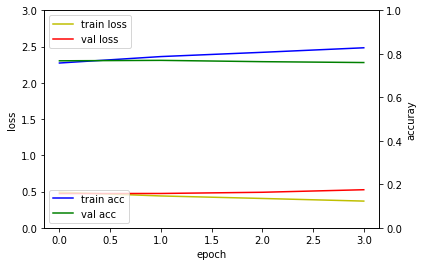

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 3.0])

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.0, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### NS 모델

In [79]:
embedding_dim = 32 # 임베딩 차원
model = Sequential([
    Embedding(vocab_size, embedding_dim), # 임베딩 층
    Bidirectional(LSTM(128)), # RNN 층. LSTM(128) 등의 다른 모델을 사용하거나 층을 추가하는 등의 변형이 가능할 것임
    Dense(1, activation='sigmoid') # 클래스가 'E' or 'I'이므로 시그모이드 함수 사용
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [80]:
# 학습 도중 수행할 콜백 함수들 설정
# 조기 종료: validation loss 값이 감소를 멈추면 학습을 조기 종료 (개선이 없더라도 3번까지는 종료하지 않고 계속 진행)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# 모델 저장: 학습 도중 validation accuracy가 가장 높은 (최근) 모델 하나를 지정한 파일에 저장
mc = ModelCheckpoint('lstm2_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [81]:
# 학습 데이터의 20%를 검증 집합으로 사용
history = model.fit(X_train, y_NS_train, batch_size=64, epochs=8, validation_split=0.2, callbacks=[es, mc])

Epoch 1/8
3865/3865 [==============================] - 83s 20ms/step - loss: 0.5611 - acc: 0.6734 - val_loss: 0.5411 - val_acc: 0.6868

Epoch 00001: val_acc improved from -inf to 0.68680, saving model to lstm2_best_model.h5
Epoch 2/8
3865/3865 [==============================] - 75s 19ms/step - loss: 0.5071 - acc: 0.7186 - val_loss: 0.5433 - val_acc: 0.6863

Epoch 00002: val_acc did not improve from 0.68680
Epoch 3/8
3865/3865 [==============================] - 76s 20ms/step - loss: 0.4644 - acc: 0.7478 - val_loss: 0.5635 - val_acc: 0.6797

Epoch 00003: val_acc did not improve from 0.68680
Epoch 4/8
3865/3865 [==============================] - 73s 19ms/step - loss: 0.4227 - acc: 0.7736 - val_loss: 0.6059 - val_acc: 0.6763

Epoch 00004: val_acc did not improve from 0.68680
Epoch 00004: early stopping


In [82]:
loaded_model = load_model('lstm2_best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_NS_test)[1]))

2430/2430 [==============================] - 7s 3ms/step - loss: 0.5421 - acc: 0.6850
테스트 정확도: 0.6850


### TF 모델

In [86]:
embedding_dim = 32 # 임베딩 차원
model = Sequential([
    Embedding(vocab_size, embedding_dim), # 임베딩 층
    Bidirectional(LSTM(128)), # RNN 층. LSTM(128) 등의 다른 모델을 사용하거나 층을 추가하는 등의 변형이 가능할 것임
    Dense(1, activation='sigmoid') # 클래스가 'E' or 'I'이므로 시그모이드 함수 사용
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [84]:
# 학습 도중 수행할 콜백 함수들 설정
# 조기 종료: validation loss 값이 감소를 멈추면 학습을 조기 종료 (개선이 없더라도 3번까지는 종료하지 않고 계속 진행)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# 모델 저장: 학습 도중 validation accuracy가 가장 높은 (최근) 모델 하나를 지정한 파일에 저장
mc = ModelCheckpoint('lstm3_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [87]:
# 학습 데이터의 20%를 검증 집합으로 사용
history = model.fit(X_train, y_TF_train, batch_size=64, epochs=8, validation_split=0.2, callbacks=[es, mc])

Epoch 1/8
3865/3865 [==============================] - 80s 20ms/step - loss: 0.5716 - acc: 0.6641 - val_loss: 0.5515 - val_acc: 0.6739

Epoch 00001: val_acc improved from -inf to 0.67393, saving model to lstm3_best_model.h5
Epoch 2/8
3865/3865 [==============================] - 75s 19ms/step - loss: 0.5124 - acc: 0.7183 - val_loss: 0.5511 - val_acc: 0.6832

Epoch 00002: val_acc improved from 0.67393 to 0.68323, saving model to lstm3_best_model.h5
Epoch 3/8
3865/3865 [==============================] - 77s 20ms/step - loss: 0.4706 - acc: 0.7462 - val_loss: 0.5853 - val_acc: 0.6816

Epoch 00003: val_acc did not improve from 0.68323
Epoch 4/8
3865/3865 [==============================] - 75s 19ms/step - loss: 0.4281 - acc: 0.7730 - val_loss: 0.6281 - val_acc: 0.6765

Epoch 00004: val_acc did not improve from 0.68323
Epoch 5/8
3865/3865 [==============================] - 80s 21ms/step - loss: 0.3880 - acc: 0.7962 - val_loss: 0.7085 - val_acc: 0.6717

Epoch 00005: val_acc did not improve from

In [88]:
loaded_model = load_model('lstm3_best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_TF_test)[1]))

2430/2430 [==============================] - 9s 3ms/step - loss: 0.5546 - acc: 0.6795
테스트 정확도: 0.6795


### JP 모델

In [89]:
embedding_dim = 32 # 임베딩 차원
model = Sequential([
    Embedding(vocab_size, embedding_dim), # 임베딩 층
    Bidirectional(LSTM(128)), # RNN 층. LSTM(128) 등의 다른 모델을 사용하거나 층을 추가하는 등의 변형이 가능할 것임
    Dense(1, activation='sigmoid') # 클래스가 'E' or 'I'이므로 시그모이드 함수 사용
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [90]:
# 학습 도중 수행할 콜백 함수들 설정
# 조기 종료: validation loss 값이 감소를 멈추면 학습을 조기 종료 (개선이 없더라도 3번까지는 종료하지 않고 계속 진행)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# 모델 저장: 학습 도중 validation accuracy가 가장 높은 (최근) 모델 하나를 지정한 파일에 저장
mc = ModelCheckpoint('lstm4_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [91]:
# 학습 데이터의 20%를 검증 집합으로 사용
history = model.fit(X_train, y_JP_train, batch_size=64, epochs=8, validation_split=0.2, callbacks=[es, mc])

Epoch 1/8
3865/3865 [==============================] - 82s 20ms/step - loss: 0.4912 - acc: 0.7578 - val_loss: 0.4725 - val_acc: 0.7680

Epoch 00001: val_acc improved from -inf to 0.76802, saving model to lstm4_best_model.h5
Epoch 2/8
3865/3865 [==============================] - 82s 21ms/step - loss: 0.4394 - acc: 0.7875 - val_loss: 0.4736 - val_acc: 0.7700

Epoch 00002: val_acc improved from 0.76802 to 0.77004, saving model to lstm4_best_model.h5
Epoch 3/8
3865/3865 [==============================] - 86s 22ms/step - loss: 0.4048 - acc: 0.8071 - val_loss: 0.4902 - val_acc: 0.7640

Epoch 00003: val_acc did not improve from 0.77004
Epoch 4/8
3865/3865 [==============================] - 91s 24ms/step - loss: 0.3685 - acc: 0.8279 - val_loss: 0.5252 - val_acc: 0.7600

Epoch 00004: val_acc did not improve from 0.77004
Epoch 00004: early stopping


In [92]:
loaded_model = load_model('lstm4_best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_JP_test)[1]))

2430/2430 [==============================] - 11s 4ms/step - loss: 0.4751 - acc: 0.7675
테스트 정확도: 0.7675


In [93]:
def EI_predict(sentence):
    sentence = ko_tokenize(sentence)
    encoded = tok.texts_to_sequences([sentence])
    sample = pad_sequences(encoded, maxlen=max_len)
    rnn_model = load_model('lstm1_best_model.h5')
    score = float(rnn_model.predict(sample))
    if (score > 0.5):
        print("{:.2f}% 확률로 E입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 I입니다.".format((1 - score) * 100))
    return 

In [2]:
def NS_predict(sentence):
    sentence = ko_tokenize(sentence)
    encoded = tok.texts_to_sequences([sentence])
    sample = pad_sequences(encoded, maxlen=max_len)
    rnn_model = load_model('lstm2_best_model.h5')
    score = float(rnn_model.predict(sample))
    if (score > 0.5):
        print("{:.2f}% 확률로 N입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 S입니다.".format((1 - score) * 100))
    return 

In [94]:
def TF_predict(sentence):
    sentence = ko_tokenize(sentence)
    encoded = tok.texts_to_sequences([sentence])
    sample = pad_sequences(encoded, maxlen=max_len)
    rnn_model = load_model('lstm3_best_model.h5')
    score = float(rnn_model.predict(sample))
    if (score > 0.5):
        print("{:.2f}% 확률로 T입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 F입니다.".format((1 - score) * 100))
    return 

In [96]:
def JP_predict(sentence):
    sentence = ko_tokenize(sentence)
    encoded = tok.texts_to_sequences([sentence])
    sample = pad_sequences(encoded, maxlen=max_len)
    rnn_model = load_model('lstm4_best_model.h5')
    score = float(rnn_model.predict(sample))
    if (score > 0.5):
        print("{:.2f}% 확률로 J입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 P입니다.".format((1 - score) * 100))
    return 

In [97]:
EI_predict('나 파티가서 친구들이랑 놀거야')

60.48% 확률로 E입니다.


In [4]:
NS_predict('나는 좀비가 나타나는 상상을 해')

NameError: name 'ko_tokenize' is not defined

In [99]:
TF_predict('공감해 나도')

63.52% 확률로 F입니다.


In [100]:
JP_predict('내일 나는 학교에 9시에 갈거야')

87.05% 확률로 J입니다.
